<a href="https://colab.research.google.com/github/nattntn/DPDM2024/blob/main/Classification_(dpdm24).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML model construction and selection procedure
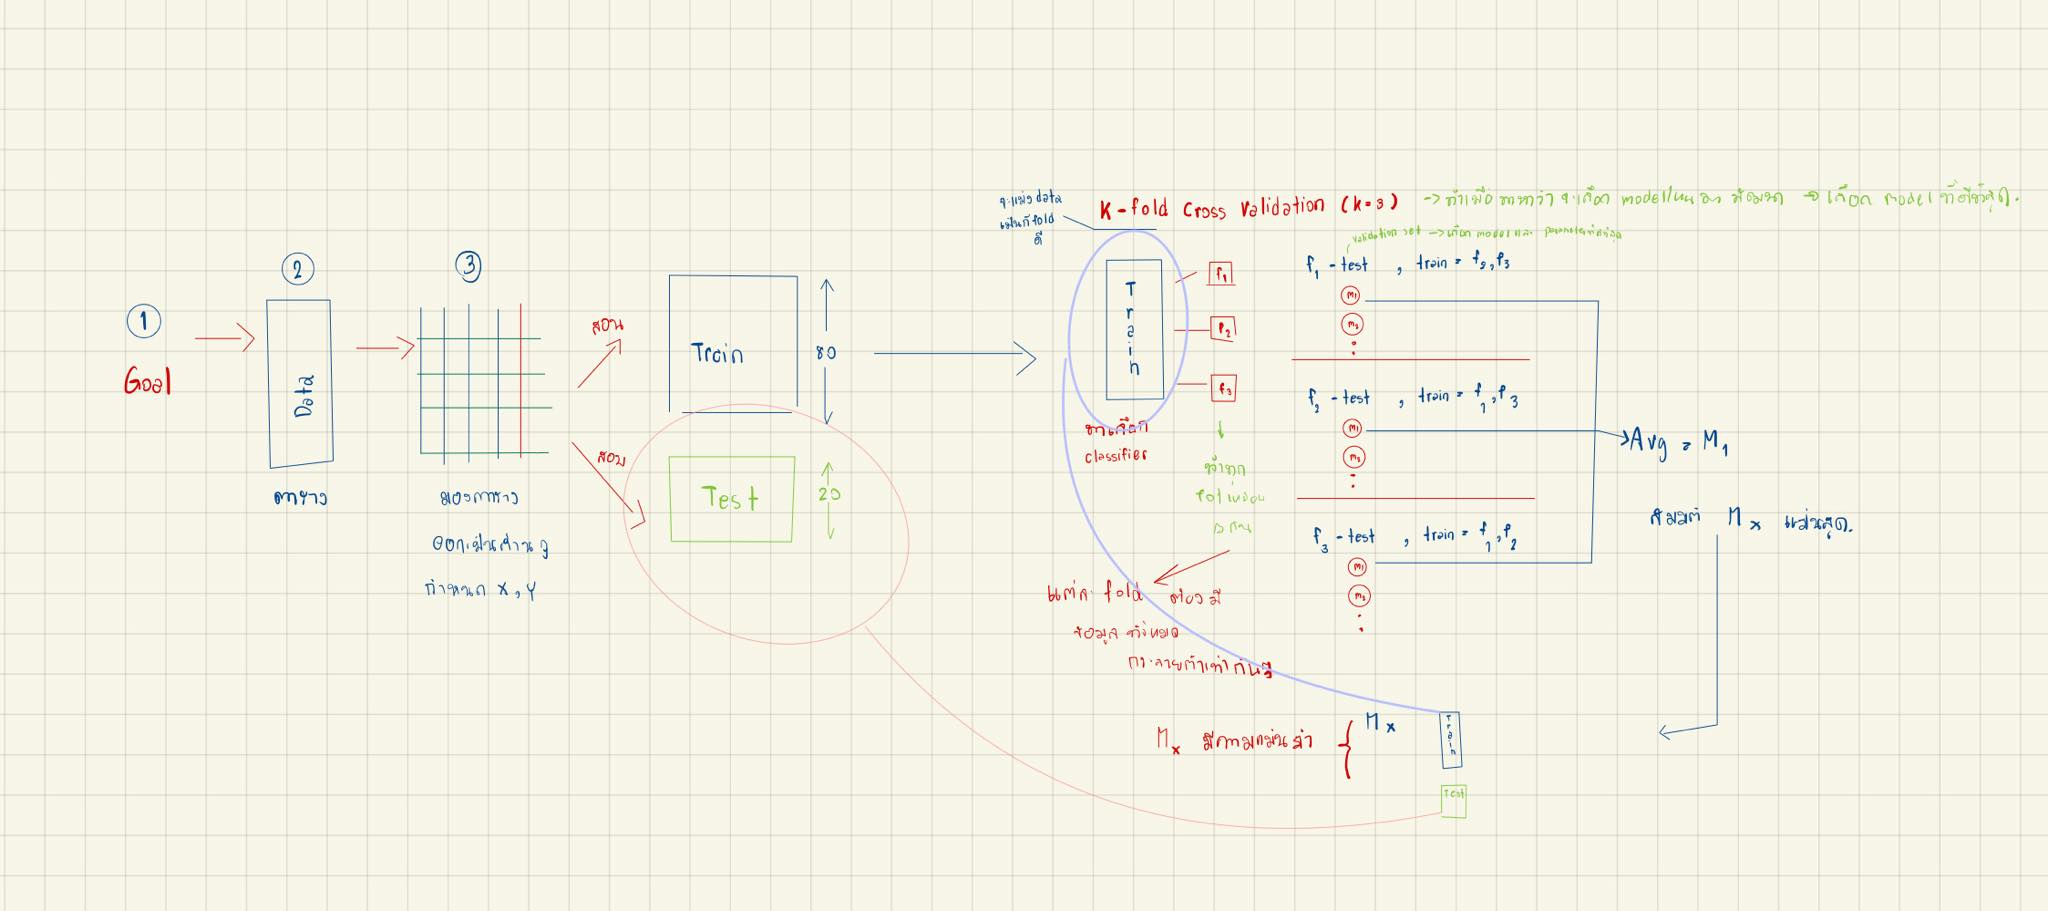

# Data

In [1]:
# prompt: load kdd99 dataset using sklearn

from sklearn.datasets import fetch_kddcup99

# Load the KDD Cup 1999 dataset
data = fetch_kddcup99()

# Access the data and target variables
X = data.data
y = data.target

print(X.shape)
print(y.shape)

(494021, 41)
(494021,)


In [2]:
data

{'data': array([[0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.0, 0.0, 0.0],
        ...,
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0],
        [0, b'tcp', b'http', ..., 0.01, 0.0, 0.0]], dtype=object),
 'target': array([b'normal.', b'normal.', b'normal.', ..., b'normal.', b'normal.',
        b'normal.'], dtype=object),
 'frame': None,
 'target_names': ['labels'],
 'feature_names': ['duration',
  'protocol_type',
  'service',
  'flag',
  'src_bytes',
  'dst_bytes',
  'land',
  'wrong_fragment',
  'urgent',
  'hot',
  'num_failed_logins',
  'logged_in',
  'num_compromised',
  'root_shell',
  'su_attempted',
  'num_root',
  'num_file_creations',
  'num_shells',
  'num_access_files',
  'num_outbound_cmds',
  'is_host_login',
  'is_guest_login',
  'count',
  'srv_count',
  'serror_rate',
  'srv_serror_rate',
  'rerror_rate',
  'srv_rerror_rate',
  'same_s

## ตรวจสอบการกระจายของ class

In [3]:
import numpy as np

# Count the number of occurrences of each class
class_counts = np.unique(y, return_counts=True)
class_counts

(array([b'back.', b'buffer_overflow.', b'ftp_write.', b'guess_passwd.',
        b'imap.', b'ipsweep.', b'land.', b'loadmodule.', b'multihop.',
        b'neptune.', b'nmap.', b'normal.', b'perl.', b'phf.', b'pod.',
        b'portsweep.', b'rootkit.', b'satan.', b'smurf.', b'spy.',
        b'teardrop.', b'warezclient.', b'warezmaster.'], dtype=object),
 array([  2203,     30,      8,     53,     12,   1247,     21,      9,
             7, 107201,    231,  97278,      3,      4,    264,   1040,
            10,   1589, 280790,      2,    979,   1020,     20]))

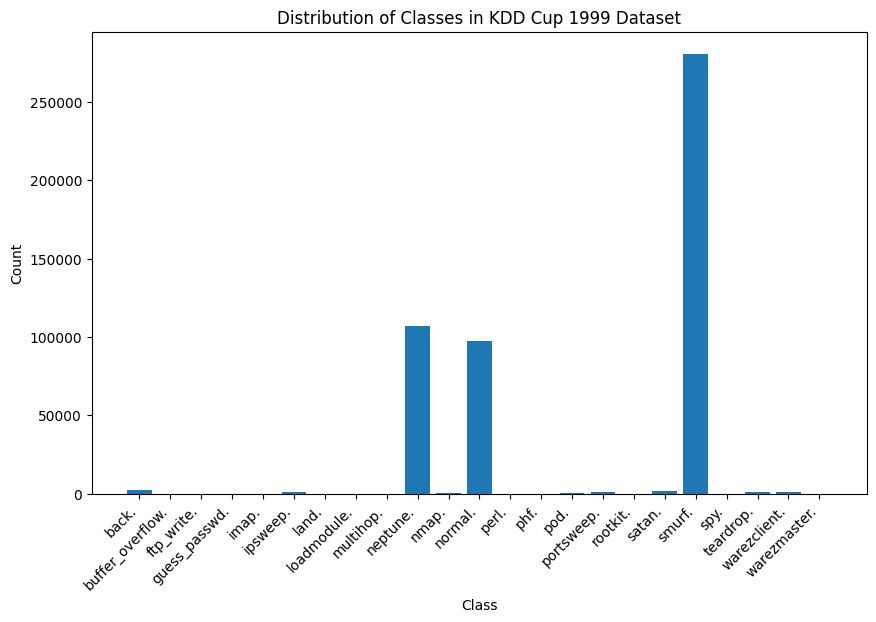

In [4]:
# prompt: plot histogram unique class

import matplotlib.pyplot as plt

# Create a histogram of the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts[0], class_counts[1])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of Classes in KDD Cup 1999 Dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

# Goal: 3-class classifier (normale, neptune, smurf)

In [5]:
# prompt: change X y  to dataframe

import pandas as pd

# Convert X and y to DataFrames
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Display the first few rows of the DataFrame
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [6]:
df['target'] = df['target'].astype(str)
df['protocol_type'] = df['protocol_type'].astype(str)
df['service'] = df['service'].astype(str)
df['flag'] = df['flag'].astype(str)

In [7]:
# เลื่อกมาเฉพาะ data ที่สนใจ
df_normal = df[df['target']=='normal.']
df_neptune = df[df['target']=='neptune.']
df_smurf = df[df['target']=='smurf.']

print(df_normal.shape)
print(df_neptune.shape)
print(df_smurf.shape)

(97278, 42)
(107201, 42)
(280790, 42)


# Train Test Split

10% as a test

In [8]:
# prompt: sampling  10% from each table (df_normal, df_neptune, df_sumrf) and concatenate in to test dataframe. and concatenate the rest into training dataframe

import pandas as pd
# Sample 10% from each dataframe
df_normal_test = df_normal.sample(frac=0.1, random_state=42)
df_neptune_test = df_neptune.sample(frac=0.1, random_state=42)
df_smurf_test = df_smurf.sample(frac=0.1, random_state=42)

# Concatenate the test samples
df_test = pd.concat([df_normal_test, df_neptune_test, df_smurf_test])

# Remove the test samples from the original dataframes
df_normal_train = df_normal.drop(df_normal_test.index)
df_neptune_train = df_neptune.drop(df_neptune_test.index)
df_smurf_train = df_smurf.drop(df_smurf_test.index)

# Concatenate the remaining data into the training dataframe
df_train = pd.concat([df_normal_train, df_neptune_train, df_smurf_train])


In [9]:
df_normal_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [10]:
df_neptune_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7601,0,tcp,telnet,S0,0,0,0,0,0,0,...,6,1.0,0.0,0.2,0.33,1.0,0.83,0.0,0.0,neptune.
7602,0,tcp,telnet,S0,0,0,0,0,0,0,...,16,1.0,0.0,0.07,0.12,1.0,0.94,0.0,0.0,neptune.
53583,0,tcp,private,S0,0,0,0,0,0,0,...,1,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,neptune.
53584,0,tcp,private,S0,0,0,0,0,0,0,...,8,0.73,0.27,0.09,0.0,1.0,1.0,0.0,0.0,neptune.
53585,0,tcp,private,S0,0,0,0,0,0,0,...,17,0.81,0.14,0.05,0.0,1.0,1.0,0.0,0.0,neptune.


In [11]:
df_smurf_train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
7793,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,3,0.02,0.02,0.02,0.0,0.0,0.0,0.0,0.0,smurf.
7794,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,13,0.08,0.02,0.08,0.0,0.0,0.0,0.0,0.0,smurf.
7795,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,23,0.14,0.02,0.14,0.0,0.0,0.0,0.0,0.0,smurf.
7796,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,33,0.19,0.02,0.19,0.0,0.0,0.0,0.0,0.0,smurf.
7797,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,43,0.23,0.02,0.23,0.0,0.0,0.0,0.0,0.0,smurf.


# cross validation

In [12]:
df_train.shape

(436742, 42)

In [13]:
df_test.shape

(48527, 42)

## 3-fold cross validation

# HW 3 แบ่ง fold โดยการสร้าง column ใหม่

DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None, ignore_index=False)[source]  


Return a random sample of items from an axis of object.

```python
.sample()```: เป็น method ที่ใช้สุ่มตัวอย่างข้อมูลจาก DataFrame  

```frac = 1```: หมายถึงการสุ่มข้อมูลทั้งหมดใน DataFrame โดยไม่ลดจำนวน (ถ้าใส่ค่าอื่นที่น้อยกว่า 1 เช่น 0.5 ก็จะสุ่มเพียง 50% ของข้อมูล)  

คำสั่งนี้เป็นการสลับลำดับของข้อมูลทั้งหมดใน df_train

In [14]:
print(f'normal: {df_normal_train.shape[0]} row')
print(f'neptune: {df_neptune_train.shape[0]} row')
print(f'smurf: {df_smurf_train.shape[0]} row')

normal: 87550 row
neptune: 96481 row
smurf: 252711 row


### shuffled (ไม่จำเป็น)

In [15]:
shuffled_df = df_train.sample(frac = 1, random_state = 99)
print(shuffled_df.shape)
shuffled_df.head()

(436742, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
274638,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
96151,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
234630,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.
19025,0,tcp,http,SF,285,1337,0,0,0,0,...,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.
263731,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.


In [16]:
shuffled_df['fold'] = ([1,2,3]* 145581)[:436742] # แบ่งกลุ่มให้class ให้ในเเต่ละกลุ่มมี class ที่มันคละ ๆ กัน

In [17]:
print(shuffled_df.shape)
shuffled_df.head()

(436742, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
274638,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,1
96151,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2
234630,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,3
19025,0,tcp,http,SF,285,1337,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,normal.,1
263731,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,smurf.,2


In [18]:
shuffled_df['fold'].value_counts() # row ละกี่แถว

,count
fold,
1,145581
2,145581
3,145580


In [19]:
shuffled_df.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
1     smurf.      84112
      neptune.    32223
      normal.     29246
2     smurf.      84294
      neptune.    32010
      normal.     29277
3     smurf.      84305
      neptune.    32248
      normal.     29027
Name: count, dtype: int64

### create fold (used)

In [20]:
df_train_fold = df_train

In [21]:
df_train_fold['fold'] = ([1,2,3]* 145581)[:436742]

In [22]:
print(df_train_fold.shape)
df_train_fold.head()

(436742, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,2
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,3
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,2


In [23]:
df_train_fold.groupby('fold')['target'].value_counts() # จำนวน class ในแต่ละ fold

fold  target  
1     smurf.      84237
      neptune.    32160
      normal.     29184
2     smurf.      84237
      neptune.    32161
      normal.     29183
3     smurf.      84237
      neptune.    32160
      normal.     29183
Name: count, dtype: int64

In [24]:
df_train_fold.groupby('fold')['target'].count()

,target
fold,
1,145581
2,145581
3,145580


# Training Procedure
[Dicision tree](https://scikit-learn.org/stable/modules/tree.html)


[Classification Report](https://scikit-learn.org/1.5/modules/generated/sklearn.metrics.classification_report.html)

## Decision Tree concept

In [ ]:
# 1. Import model package
from sklearn import tree

# 2. Define model specification

treeX_foldX = tree.DecisionTreeClassifier(max_depth=5)

# 3. Train model
X = dummyX
Y = dummyY
treeX_flodX.fit(X, Y) #Y = class

# 4. Predict-Evaluation
from sklearn.metrics import classification_report
Y_val_hat = treeX_flodX.predict(X_val)
print(classification_report(Y_val, Y_val_hat))


# HW4 หาต้นไม้ที่ดีที่สุดจาก 2 ต้น แล้ว report test set accuracy

## define data

### Train and validation set

In [25]:
#training set
print(df_train_fold.shape)
df_train_fold.head()

(436742, 43)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,fold
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,1
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,2
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,3
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,1
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,2


In [26]:
df_train_fold_dummy = pd.get_dummies(df_train_fold, columns=['protocol_type', 'service', 'flag'])
print(df_train_fold_dummy.shape)
df_train_fold_dummy.head()

(436742, 117)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF
0,0,181,5450,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
1,0,239,486,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
2,0,235,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,0,219,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
4,0,217,2032,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True


In [27]:
# prompt: change target to numeric with LabelEncoder and keep it in same column

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
le = LabelEncoder()

# Fit and transform the 'target' column and replace it in the same column
df_train_fold_dummy['target'] = le.fit_transform(df_train_fold_dummy['target'])

In [28]:
df_train_fold_dummy.shape

(436742, 117)

In [29]:
df_fold_1 = df_train_fold_dummy[df_train_fold_dummy['fold']==1]
print(df_fold_1.shape)
df_fold_1.head()

(145581, 117)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF
0,0,181,5450,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,0,219,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
6,0,212,1940,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
9,0,212,786,0,0,0,1,0,1,0,...,False,False,False,False,False,False,False,False,False,True
12,0,222,773,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True


In [30]:
df_fold_1_X = df_fold_1.drop(columns=['target','fold'])
print(df_fold_1_X.shape)
df_fold_1_X.head()

(145581, 115)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF
0,0,181,5450,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
3,0,219,1337,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
6,0,212,1940,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
9,0,212,786,0,0,0,1,0,1,0,...,False,False,False,False,False,False,False,False,False,True
12,0,222,773,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True


In [31]:
df_fold_1_Y = df_fold_1['target']
print(df_fold_1_Y.shape)
df_fold_1_Y.head()

(145581,)


,target
0,1
3,1
6,1
9,1
12,1


In [32]:
df_fold_2 = df_train_fold_dummy[df_train_fold_dummy['fold']==2]
print(df_fold_2.shape)
df_fold_2_X = df_fold_2.drop(columns=['target','fold'])
print(df_fold_2_X.shape)
df_fold_2_Y = df_fold_2['target']
print(df_fold_2_Y.shape)

(145581, 117)
(145581, 115)
(145581,)


In [33]:
df_fold_3 = df_train_fold_dummy[df_train_fold_dummy['fold']==3]
print(df_fold_3.shape)
df_fold_3_X = df_fold_3.drop(columns=['target','fold'])
print(df_fold_3_X.shape)
df_fold_3_Y = df_fold_3['target']
print(df_fold_3_Y.shape)

(145580, 117)
(145580, 115)
(145580,)


### Test

In [34]:
#test set (model unseen)
print(df_test.shape)
df_test.head()

(48527, 42)


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
84672,0,tcp,http,SF,200,563,0,0,0,0,...,255,1.0,0.0,0.12,0.03,0.0,0.02,0.0,0.0,normal.
104569,0,tcp,http,SF,167,1578,0,0,0,0,...,255,1.0,0.0,0.5,0.08,0.0,0.0,0.0,0.0,normal.
147646,0,tcp,smtp,SF,2030,332,0,0,0,0,...,170,0.71,0.05,0.01,0.01,0.0,0.0,0.0,0.0,normal.
37376,0,tcp,http,SF,339,2037,0,0,0,0,...,255,1.0,0.0,0.02,0.04,0.0,0.0,0.0,0.0,normal.
4166,0,udp,domain_u,SF,44,69,0,0,0,0,...,215,0.84,0.01,0.0,0.0,0.0,0.0,0.0,0.0,normal.


In [35]:
df_test_dummy = pd.get_dummies(df_test, columns=['protocol_type', 'service', 'flag'])
print(df_test_dummy.shape)
df_test_dummy.head()

(48527, 112)


,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,service_vmnet,service_whois,flag_REJ,flag_RSTO,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF
84672,0,200,563,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
104569,0,167,1578,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
147646,0,2030,332,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
37376,0,339,2037,0,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,True
4166,0,44,69,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,True


In [36]:
# Fit and transform the 'target' column and replace it in the same column
df_test_dummy['target'] = le.fit_transform(df_test_dummy['target'])

In [37]:
df_test_dummy_X = df_test_dummy.drop(columns='target')
print(df_test_dummy_X.shape)
df_test_dummy_Y = df_test_dummy['target']
print(df_test_dummy_Y.shape)

(48527, 111)
(48527,)


## 1. Import model package

In [38]:
from sklearn import tree

## default model

```python
class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0, monotonic_cst=None)

```



### test fold 1

In [88]:
# 2. Define model specification
tree_fold1 = tree.DecisionTreeClassifier(random_state=99)

# 3. Train model
X = pd.concat([df_fold_2_X,df_fold_3_X])
Y = pd.concat([df_fold_2_Y,df_fold_3_Y])
tree_fold1.fit(X, Y) #Y = class

DecisionTreeClassifier(random_state=99)

In [89]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold1.predict(df_fold_1_X)
accuracy_fold1 = accuracy_score(df_fold_1_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_1_Y, Y_val_hat)}')
print(classification_report(df_fold_1_Y, Y_val_hat))

accuracy = 0.9999725238870457
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29184
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



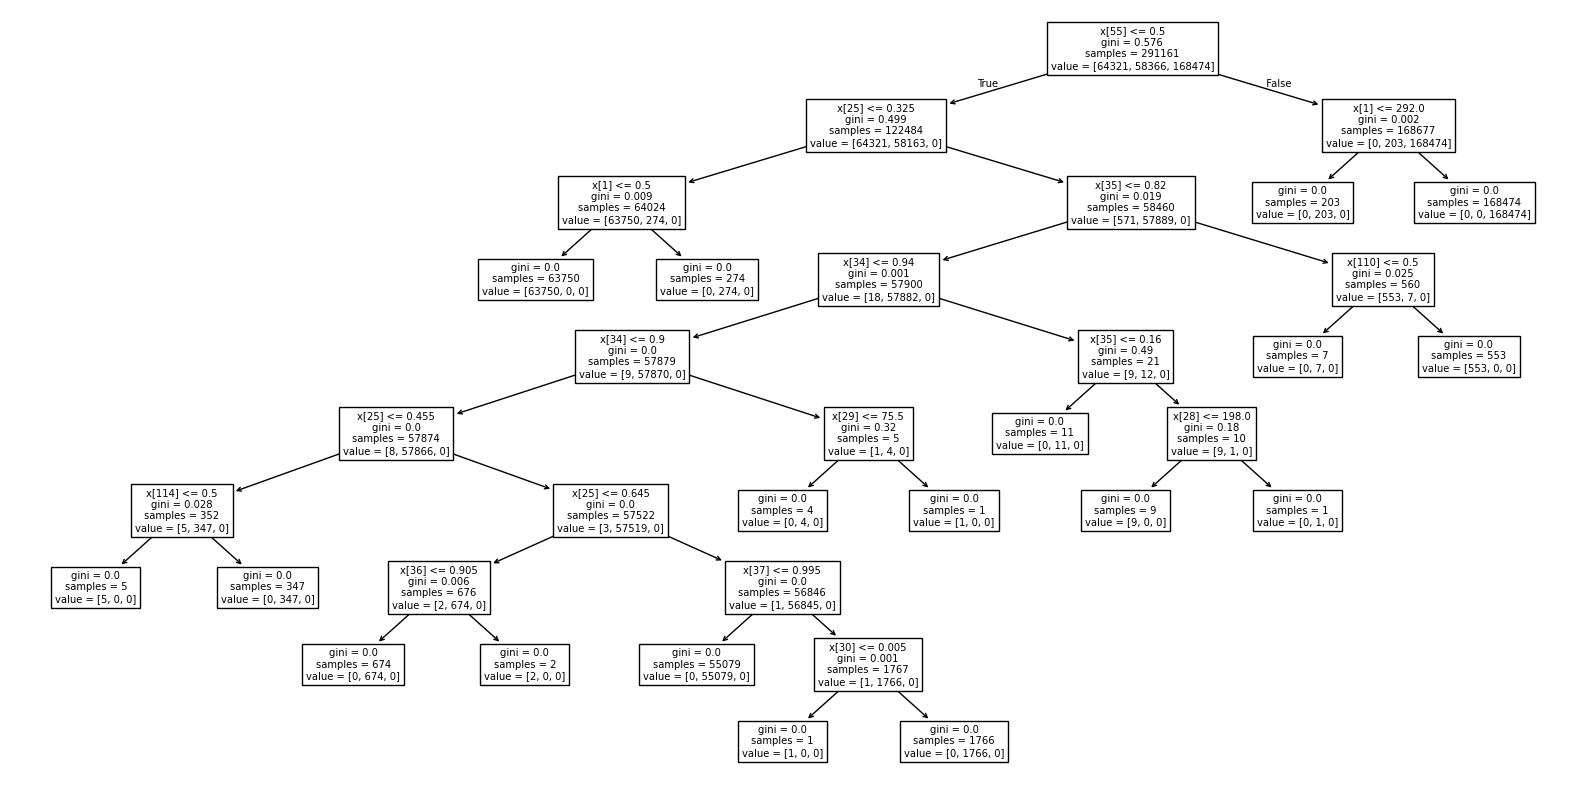

In [90]:
from sklearn import tree
plt.figure(figsize=(20, 10))
tree.plot_tree(tree_fold1);

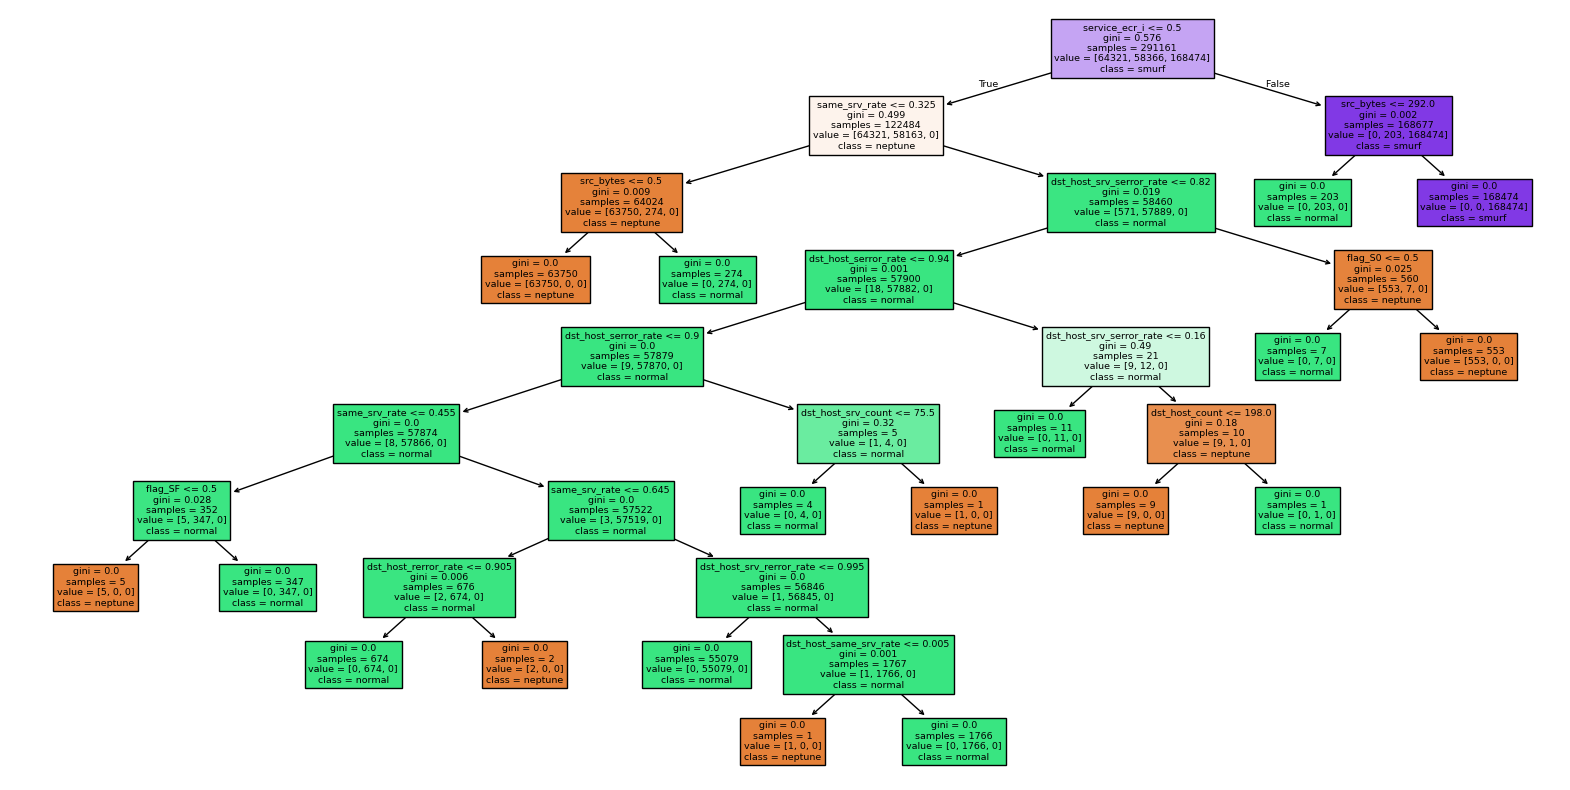

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))  # Increase the figure size
plot_tree(tree_fold1, filled=True, feature_names=df_fold_1_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 2

In [92]:
# 2. Define model specification
tree_fold2 = tree.DecisionTreeClassifier(random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_3_X])
Y = pd.concat([df_fold_1_Y,df_fold_3_Y])
tree_fold2.fit(X, Y) #Y = class

DecisionTreeClassifier(random_state=99)

In [93]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold2.predict(df_fold_2_X)
accuracy_fold2 = accuracy_score(df_fold_2_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_2_Y, Y_val_hat)}')
print(classification_report(df_fold_2_Y, Y_val_hat))

accuracy = 0.9999862619435228
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32161
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



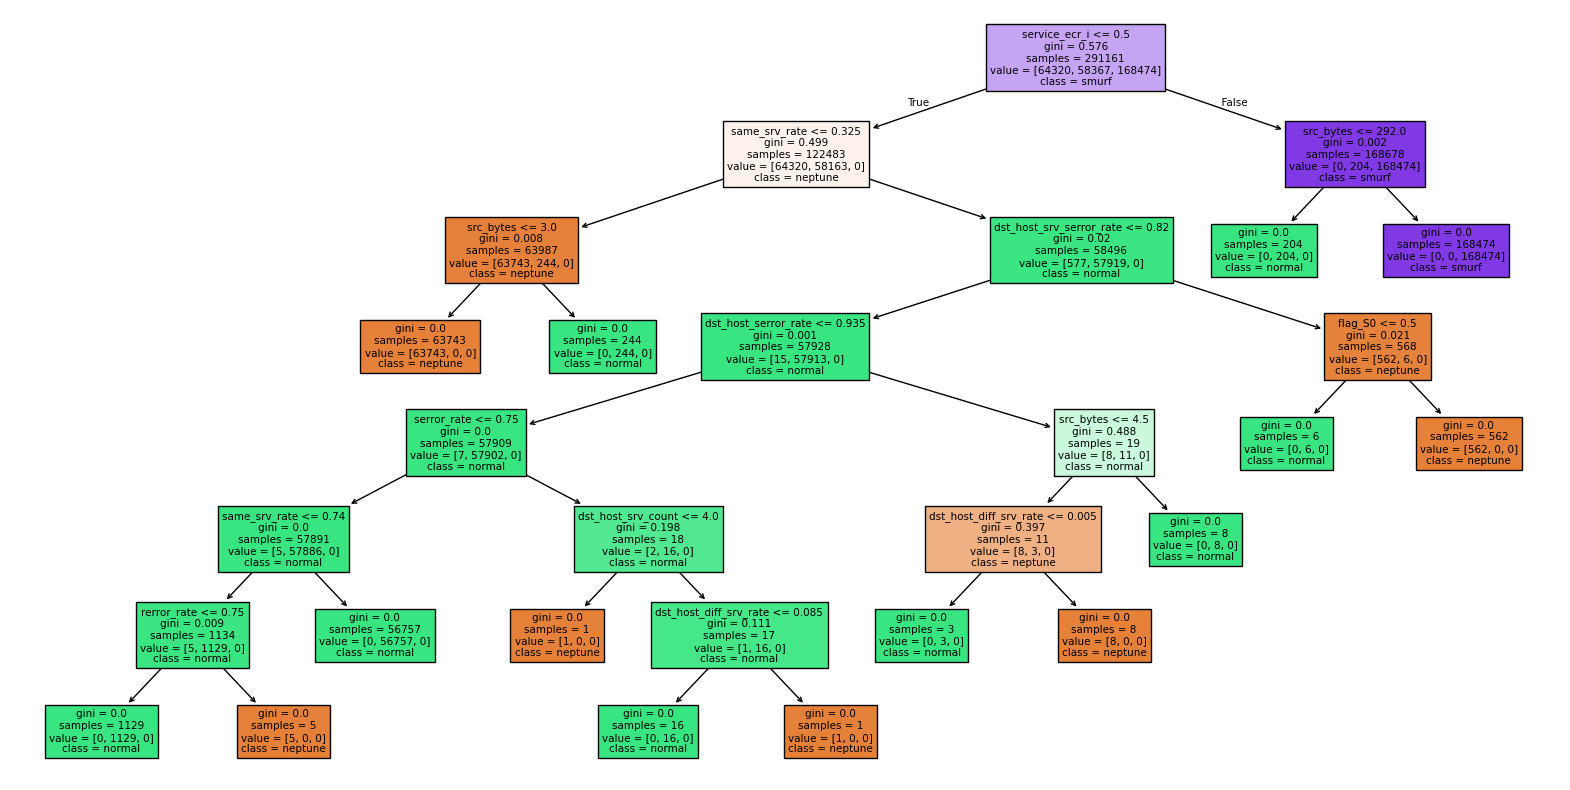

In [94]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold2, filled=True, feature_names=df_fold_2_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 3

In [95]:
# 2. Define model specification
tree_fold3 = tree.DecisionTreeClassifier(random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_2_X])
Y = pd.concat([df_fold_1_Y,df_fold_2_Y])
tree_fold3.fit(X, Y) #Y = class

DecisionTreeClassifier(random_state=99)

In [96]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold3.predict(df_fold_3_X)
accuracy_fold3 = accuracy_score(df_fold_3_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_3_Y, Y_val_hat)}')
print(classification_report(df_fold_3_Y, Y_val_hat))

accuracy = 0.9999587855474653
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



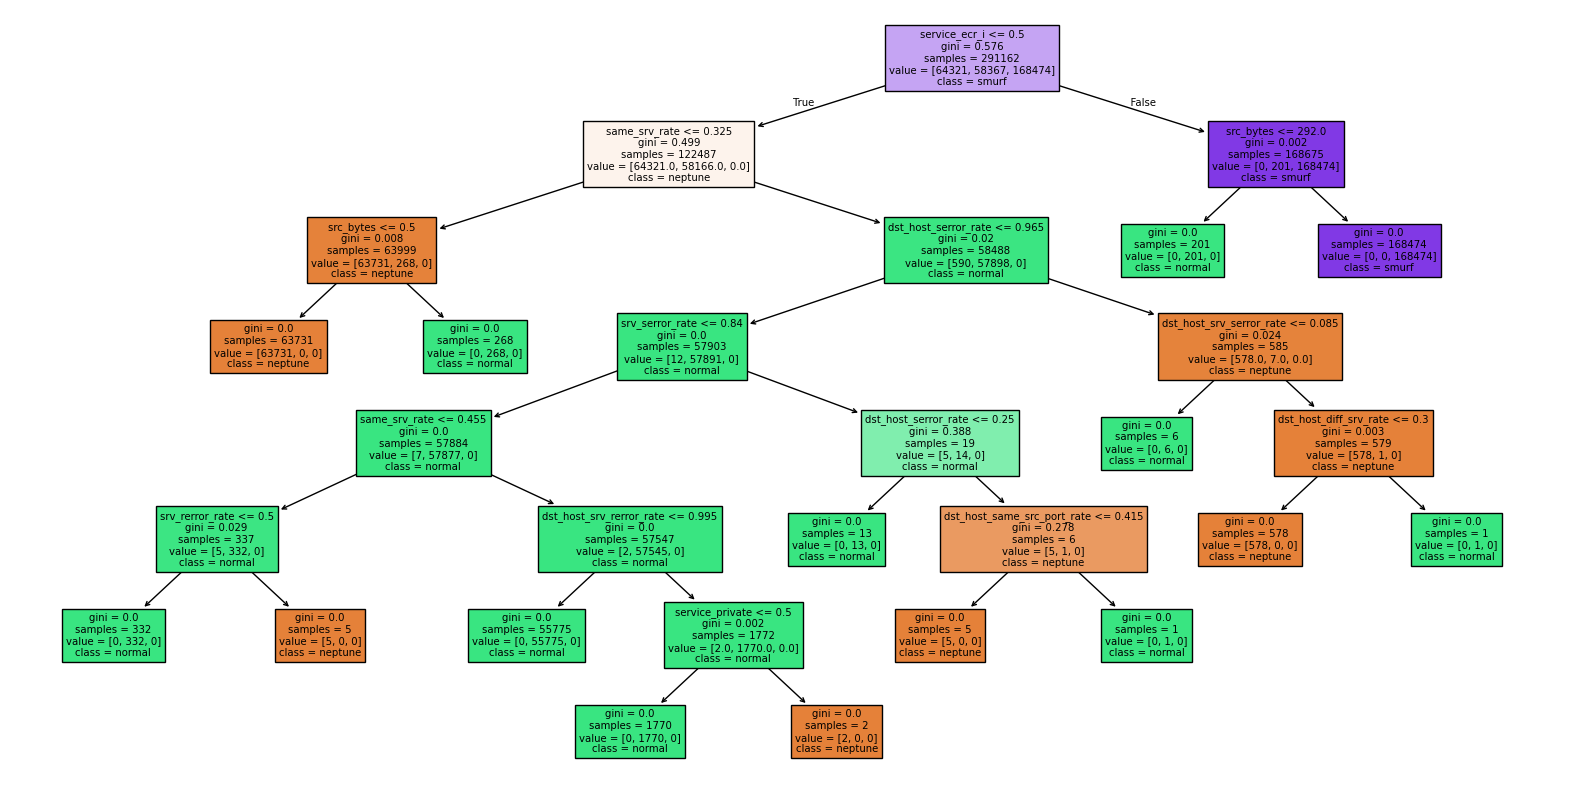

In [97]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold3, filled=True, feature_names=df_fold_3_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### mean

In [98]:
mean_accuracy_model_default = (accuracy_fold1 + accuracy_fold2 + accuracy_fold3) / 3

print(f"Accuracy for tree_fold1: {accuracy_fold1}")
print(f"Accuracy for tree_fold2: {accuracy_fold2}")
print(f"Accuracy for tree_fold3: {accuracy_fold3}")
print(f"Mean Accuracy: {mean_accuracy_model_default}")

Accuracy for tree_fold1: 0.9999725238870457
Accuracy for tree_fold2: 0.9999862619435228
Accuracy for tree_fold3: 0.9999587855474653
Mean Accuracy: 0.9999725237926779


## model 1

### test fold 1

In [68]:
# 2. Define model specification
tree_fold1 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6,  random_state=99) #min_samples_split=5, min_samples_leaf=5,

# 3. Train model
X = pd.concat([df_fold_2_X,df_fold_3_X])
Y = pd.concat([df_fold_2_Y,df_fold_3_Y])
tree_fold1.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, random_state=99, splitter='random')

In [69]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold1.predict(df_fold_1_X)
accuracy_fold1 = accuracy_score(df_fold_1_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_1_Y, Y_val_hat)}')
print(classification_report(df_fold_1_Y, Y_val_hat))

accuracy = 0.9999313097176142
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29184
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



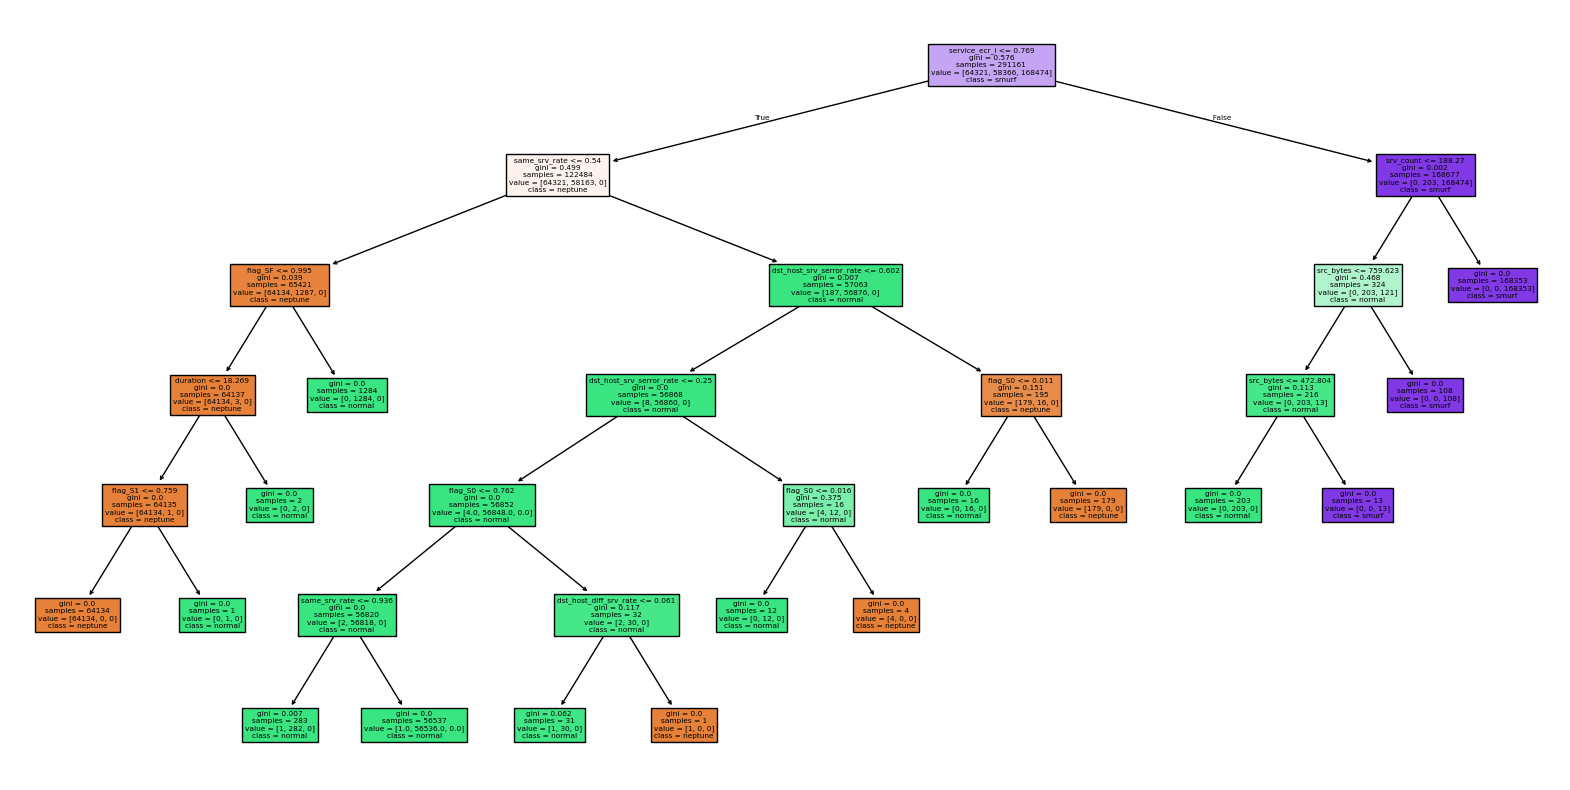

In [70]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold1, filled=True, feature_names=df_fold_1_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 2

In [71]:
# 2. Define model specification
tree_fold2 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6,  random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_3_X])
Y = pd.concat([df_fold_1_Y,df_fold_3_Y])
tree_fold2.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, random_state=99, splitter='random')

In [72]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold2.predict(df_fold_2_X)
accuracy_fold2 = accuracy_score(df_fold_2_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_2_Y, Y_val_hat)}')
print(classification_report(df_fold_2_Y, Y_val_hat))

accuracy = 0.9999725238870457
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32161
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



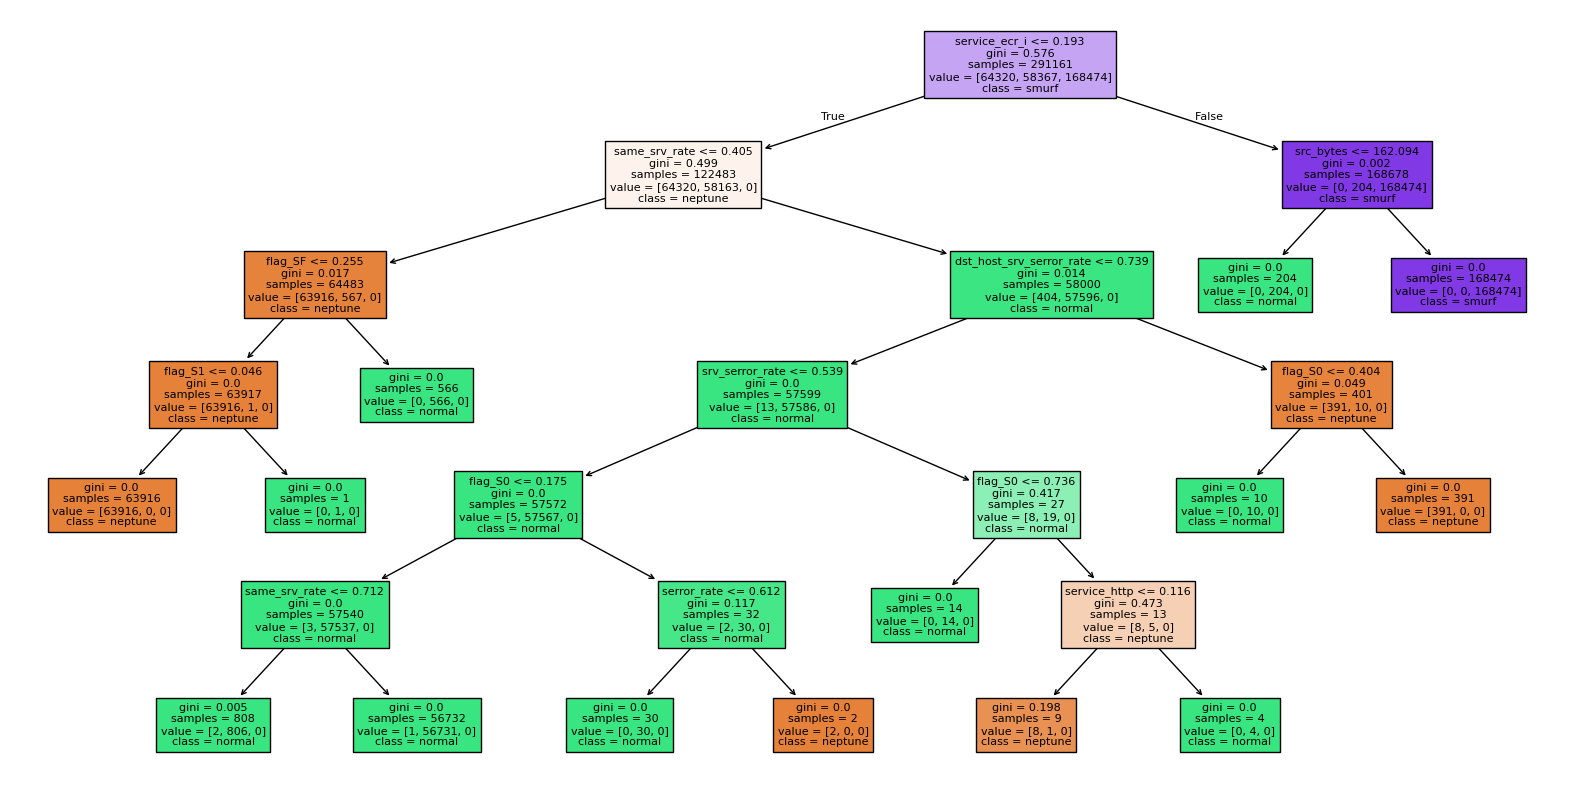

In [73]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold2, filled=True, feature_names=df_fold_2_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 3

In [74]:
# 2. Define model specification
tree_fold3 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6,  random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_2_X])
Y = pd.concat([df_fold_1_Y,df_fold_2_Y])
tree_fold3.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, random_state=99, splitter='random')

In [75]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold3.predict(df_fold_3_X)
accuracy_fold3 = accuracy_score(df_fold_3_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_3_Y, Y_val_hat)}')
print(classification_report(df_fold_3_Y, Y_val_hat))

accuracy = 0.9999793927737326
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



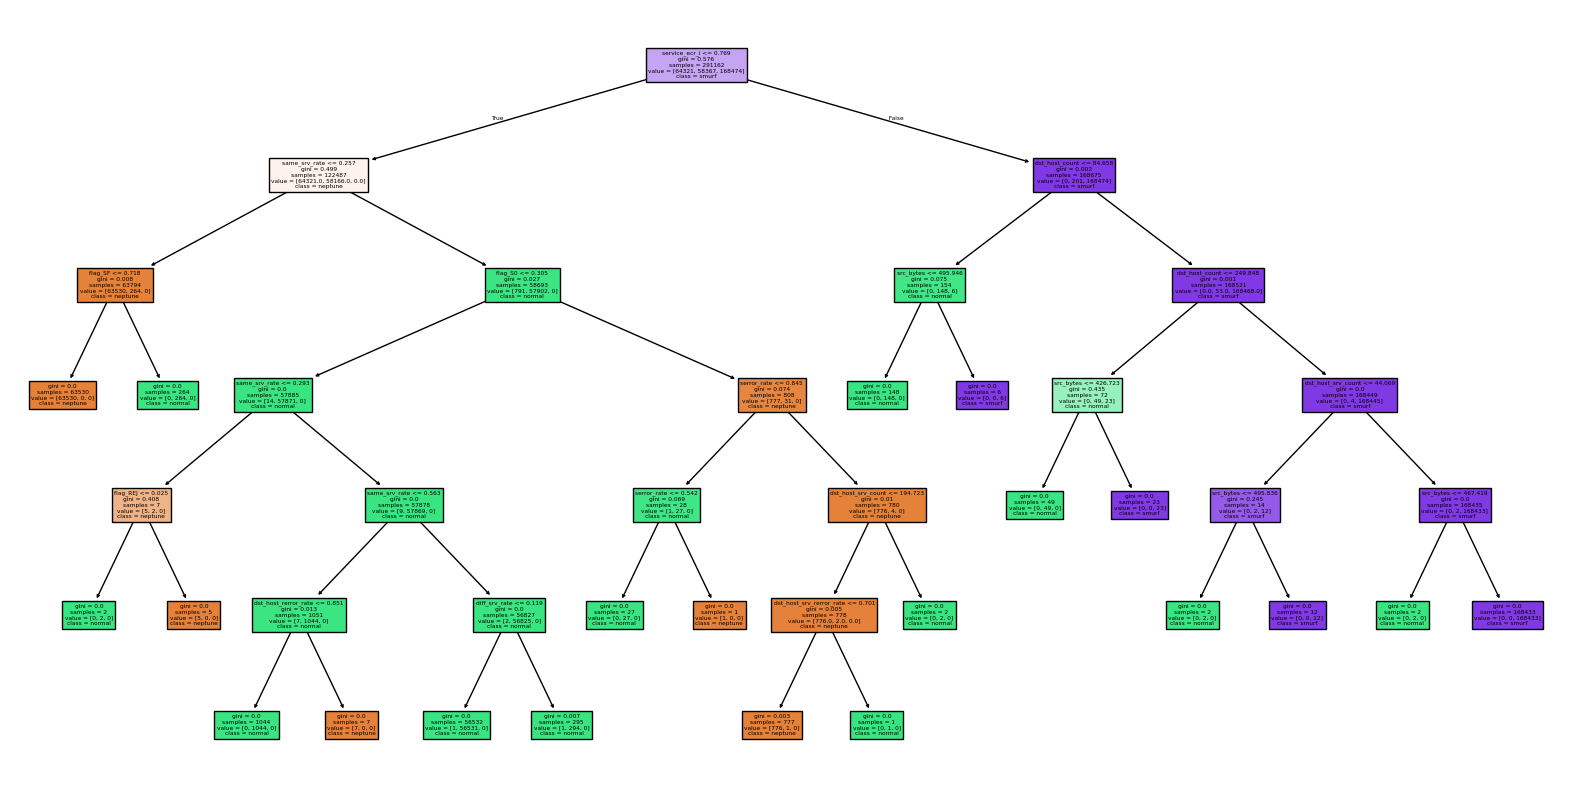

In [76]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold3, filled=True, feature_names=df_fold_3_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### mean

In [77]:
mean_accuracy_model1 = (accuracy_fold1 + accuracy_fold2 + accuracy_fold3) / 3

print(f"Accuracy for tree_fold1: {accuracy_fold1}")
print(f"Accuracy for tree_fold2: {accuracy_fold2}")
print(f"Accuracy for tree_fold3: {accuracy_fold3}")
print(f"Mean Accuracy: {mean_accuracy_model1}")

Accuracy for tree_fold1: 0.9999313097176142
Accuracy for tree_fold2: 0.9999725238870457
Accuracy for tree_fold3: 0.9999793927737326
Mean Accuracy: 0.9999610754594642


## model 2

### test fold 1

In [78]:
# 2. Define model specification
tree_fold1 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6, min_samples_split=5, min_samples_leaf=5, random_state=99) #

# 3. Train model
X = pd.concat([df_fold_2_X,df_fold_3_X])
Y = pd.concat([df_fold_2_Y,df_fold_3_Y])
tree_fold1.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=99, splitter='random')

In [79]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold1.predict(df_fold_1_X)
accuracy_fold1 = accuracy_score(df_fold_1_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_1_Y, Y_val_hat)}')
print(classification_report(df_fold_1_Y, Y_val_hat))

accuracy = 0.9999244406893757
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29184
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



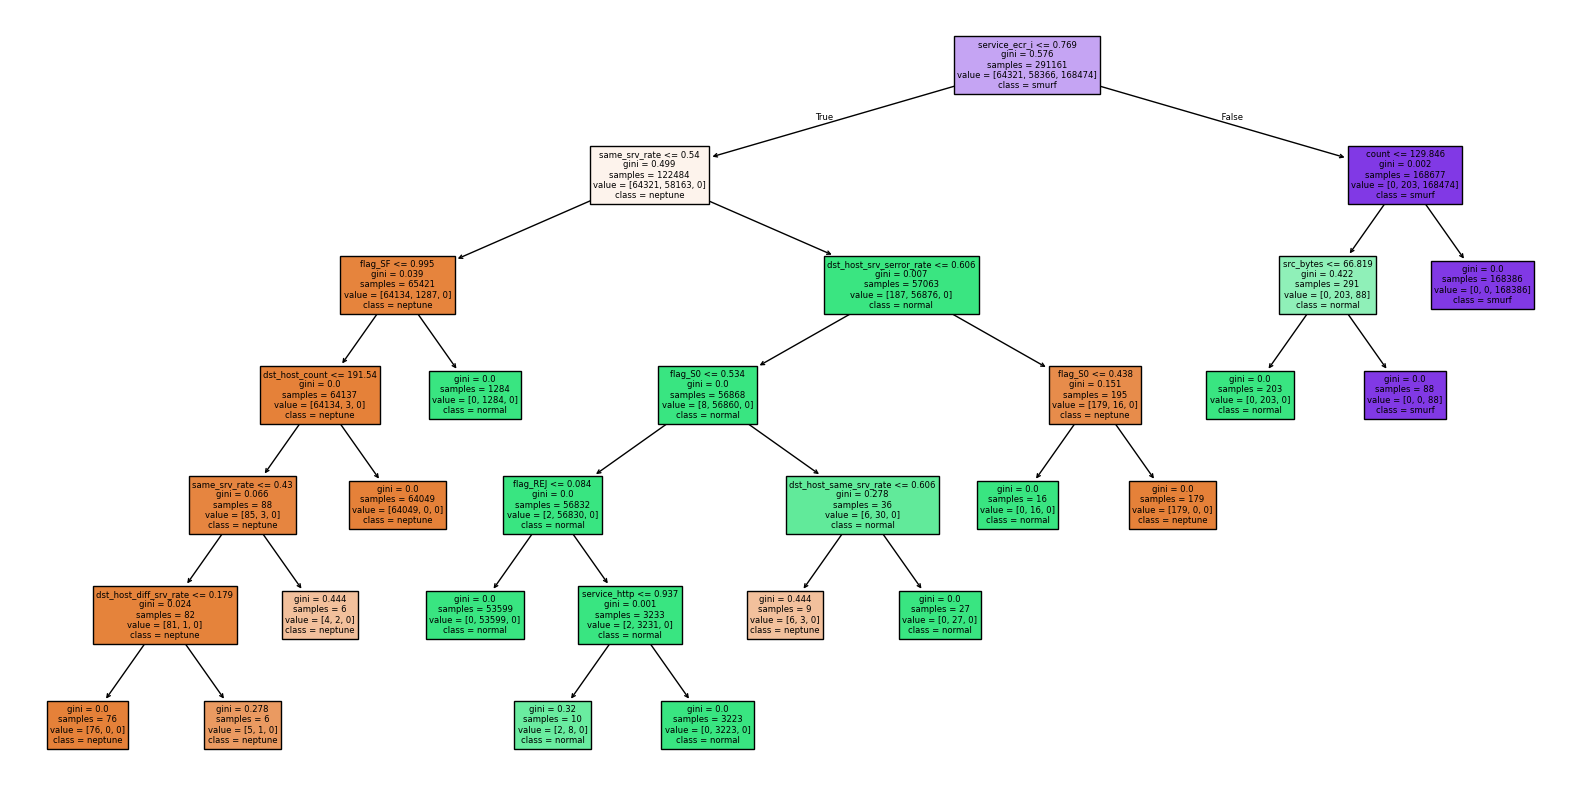

In [80]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold1, filled=True, feature_names=df_fold_1_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 2

In [81]:
# 2. Define model specification
tree_fold2 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6, min_samples_split=5, min_samples_leaf=5,  random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_3_X])
Y = pd.concat([df_fold_1_Y,df_fold_3_Y])
tree_fold2.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=99, splitter='random')

In [82]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold2.predict(df_fold_2_X)
accuracy_fold2 = accuracy_score(df_fold_2_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_2_Y, Y_val_hat)}')
print(classification_report(df_fold_2_Y, Y_val_hat))

accuracy = 0.9999656548588072
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32161
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145581
   macro avg       1.00      1.00      1.00    145581
weighted avg       1.00      1.00      1.00    145581



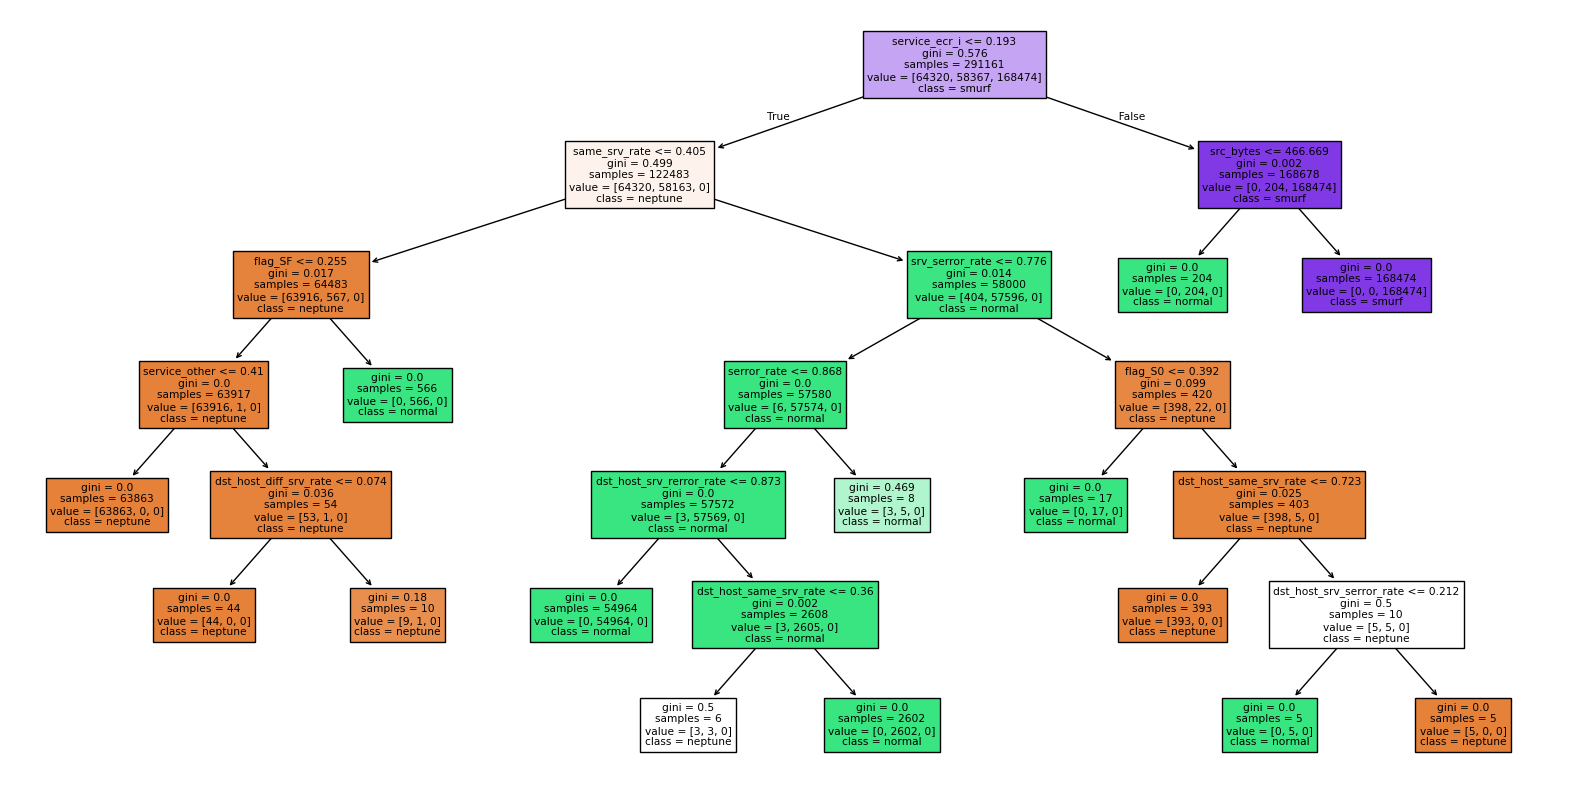

In [83]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold2, filled=True, feature_names=df_fold_2_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### test fold 3

In [84]:
# 2. Define model specification
tree_fold3 = tree.DecisionTreeClassifier(criterion='gini', splitter='random', max_depth=6, min_samples_split=5, min_samples_leaf=5, random_state=99)

# 3. Train model
X = pd.concat([df_fold_1_X,df_fold_2_X])
Y = pd.concat([df_fold_1_Y,df_fold_2_Y])
tree_fold3.fit(X, Y) #Y = class

DecisionTreeClassifier(max_depth=6, min_samples_leaf=5, min_samples_split=5,
                       random_state=99, splitter='random')

In [85]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_fold3.predict(df_fold_3_X)
accuracy_fold3 = accuracy_score(df_fold_3_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_fold_3_Y, Y_val_hat)}')
print(classification_report(df_fold_3_Y, Y_val_hat))

accuracy = 0.9999450473966204
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     32160
           1       1.00      1.00      1.00     29183
           2       1.00      1.00      1.00     84237

    accuracy                           1.00    145580
   macro avg       1.00      1.00      1.00    145580
weighted avg       1.00      1.00      1.00    145580



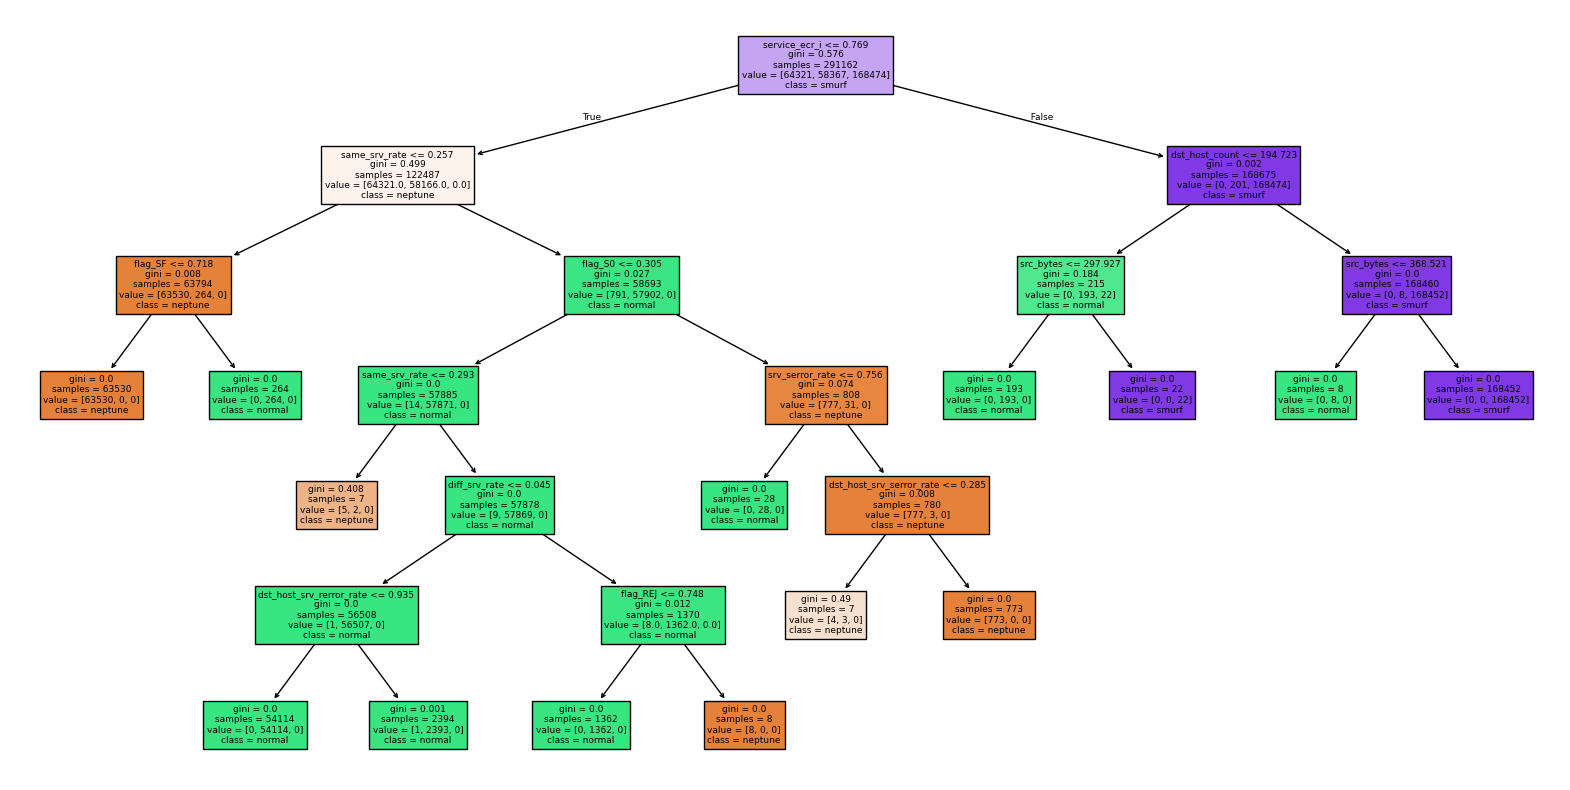

In [86]:
plt.figure(figsize=(20, 10))
plot_tree(tree_fold3, filled=True, feature_names=df_fold_3_X.columns, class_names=['neptune', 'normal', 'smurf'])
plt.show()

### mean

In [87]:
mean_accuracy_model2 = (accuracy_fold1 + accuracy_fold2 + accuracy_fold3) / 3

print(f"Accuracy for tree_fold1: {accuracy_fold1}")
print(f"Accuracy for tree_fold2: {accuracy_fold2}")
print(f"Accuracy for tree_fold3: {accuracy_fold3}")
print(f"Mean Accuracy: {mean_accuracy_model2}")

Accuracy for tree_fold1: 0.9999244406893757
Accuracy for tree_fold2: 0.9999656548588072
Accuracy for tree_fold3: 0.9999450473966204
Mean Accuracy: 0.9999450476482677


# Evaluate with test set

In [99]:
print(f"Accuracy for model default: {mean_accuracy_model_default}")
print(f"Accuracy for model 1: {mean_accuracy_model1}")
print(f"Accuracy for model 2: {mean_accuracy_model2}")

Accuracy for model default: 0.9999725237926779
Accuracy for model 1: 0.9999610754594642
Accuracy for model 2: 0.9999450476482677


In [103]:
X_train = df_train_fold_dummy.drop(columns=['target','fold'])
print(X_train.shape)
Y_train = df_train_fold_dummy['target']
print(Y_train.shape)

(436742, 115)
(436742,)


In [107]:
df_test_dummy_X.shape

(48527, 111)

In [104]:
# 2. Define model specification
tree_default = tree.DecisionTreeClassifier(random_state=99)

# 3. Train model
X = X_train
Y = Y_train
tree_default.fit(X, Y) #Y

DecisionTreeClassifier(random_state=99)

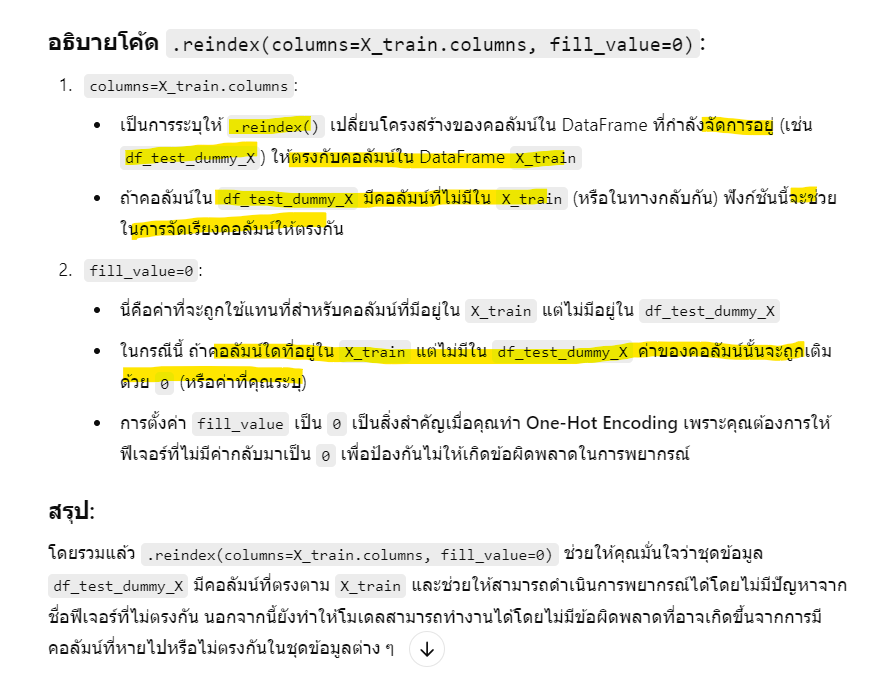

In [111]:
df_test_dummy_X = df_test_dummy_X.reindex(columns=X_train.columns, fill_value=0)

In [112]:
# 4. Predict-Evaluation
from sklearn.metrics import accuracy_score, classification_report
Y_val_hat = tree_default.predict(df_test_dummy_X)
# accuracy_fold3 = accuracy_score(df_test_dummy_Y, Y_val_hat)
print(f'accuracy = {accuracy_score(df_test_dummy_Y, Y_val_hat)}')
print(classification_report(df_test_dummy_Y, Y_val_hat))

accuracy = 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10720
           1       1.00      1.00      1.00      9728
           2       1.00      1.00      1.00     28079

    accuracy                           1.00     48527
   macro avg       1.00      1.00      1.00     48527
weighted avg       1.00      1.00      1.00     48527

